# **Loading in dataset:**


In [1]:
# Install Kaggle
!pip install -q kaggle

In [2]:
# Upload kaggle key:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hugomerkens","key":"7b460225039881d76ff98c96f910de02"}'}

In [3]:
# Create a Kaggle folder
! mkdir ~/.kaggle

In [4]:
# Copy the kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d projectlzp201910094/applescabfds

 98% 713M/725M [00:05<00:00, 174MB/s]
100% 725M/725M [00:05<00:00, 128MB/s]


In [7]:
!unzip applescabfds.zip

Archive:  applescabfds.zip
  inflating: AppleScabFDs/Healthy/20200714_162002.jpg  
  inflating: AppleScabFDs/Healthy/20200714_162007.jpg  
  inflating: AppleScabFDs/Healthy/20200714_162011.jpg  
  inflating: AppleScabFDs/Healthy/20200714_162039.jpg  
  inflating: AppleScabFDs/Healthy/20200714_162112.jpg  
  inflating: AppleScabFDs/Healthy/IMG_5913.JPG  
  inflating: AppleScabFDs/Healthy/IMG_5914.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6743.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6875.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6889.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6892.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6894.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6895.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6896.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6897.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6900.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6901.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6927.JPG  
  inflating: AppleScabFDs/Healthy/IMG_6931.JPG  
  infla

In [8]:
# grader-required-cell
import os

source_path = "/content/AppleScabFDs"

source_path_healthy = os.path.join(source_path, 'Healthy')
source_path_scab = os.path.join(source_path, 'Scab')

# Deletes all non-image files (there are two .db files bundled into the dataset)
#!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_healthy))} images of healthy.")
print(f"There are {len(os.listdir(source_path_scab))} images of scab.")

print()
print(source_path_healthy)
print(source_path_scab)

There are 90 images of healthy.
There are 207 images of scab.

/content/AppleScabFDs/Healthy
/content/AppleScabFDs/Scab


In [9]:
healthy_names = os.listdir(source_path_healthy)
print(healthy_names[:10])

scab_names = os.listdir(source_path_scab)
print(scab_names[:10])

['P1130626.JPG', 'P1130682.JPG', 'IMG_7200.JPG', 'IMG_7641.JPG', 'P1130672.JPG', 'P1130629.JPG', 'IMG_7687.JPG', 'P1130641.JPG', 'IMG_6875.JPG', 'P1130628.JPG']
['IMG_7679.JPG', 'IMG_7038.JPG', 'IMG_7547.JPG', 'IMG_7350.JPG', 'IMG_7638.JPG', 'IMG_7286.JPG', 'IMG_7935.JPG', 'IMG_8787.JPG', 'IMG_7312.JPG', 'IMG_7640.JPG']


# **Data visualization**

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 2
ncols = 4

# Index for iterating over images
pic_index = 0

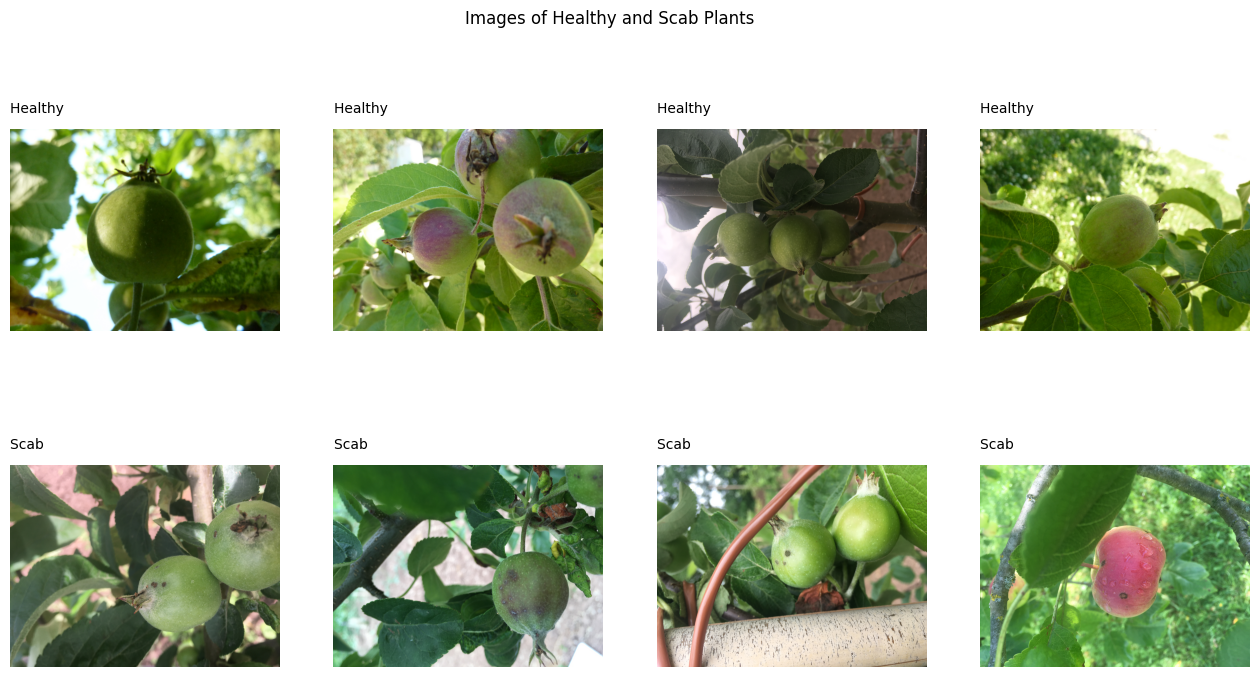

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import random

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_healthy_pix = [os.path.join(source_path_healthy, fname) 
                for fname in healthy_names[pic_index-4:pic_index]] # if using -8 we get dubble the pictures
next_scab_pix = [os.path.join(source_path_scab, fname) 
                for fname in scab_names[pic_index-4:pic_index]] # if using -8 we get dubble the pictures

for i, img_path in enumerate(next_healthy_pix+next_scab_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

# Get the label of the image based on its path
  if img_path in next_healthy_pix:
    label = 'Healthy \n'
  else:
    label = 'Scab \n'

  # Add the label as text to the subplot
  plt.text(0, 0, label, ha='left')

  plt.suptitle('Images of Healthy and Scab Plants')

#plt.savefig('applescab.png')
plt.show()

# As the data is unbalanced, select 4 random images instead of the next 4 images.

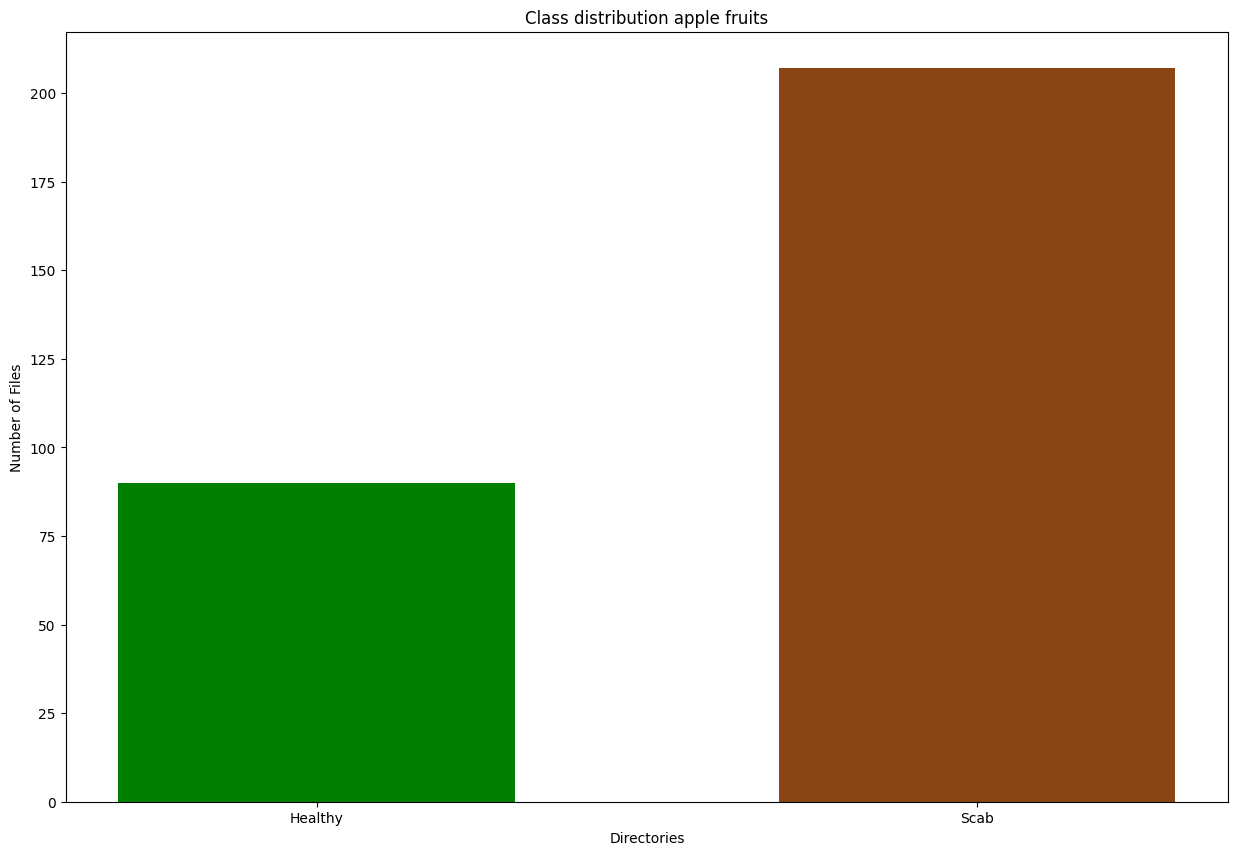

In [40]:
# class distribution:
import numpy as np
import matplotlib.pyplot as plt

n_healthy = len(os.listdir(source_path_healthy))
n_scab = len(os.listdir(source_path_scab))

# Create a bar plot
labels = ['Healthy', 'Scab']
values = [n_healthy, n_scab]

colors = ['green', 'saddlebrown']

plt.figure(figsize = (15, 10))
plt.bar(labels, values, color=colors, width=0.6, align='center')
plt.title('Class distribution apple fruits')
plt.xlabel('Directories')
plt.ylabel('Number of Files')
plt.show()
 


In [67]:
from PIL import Image

# open the image file
img = Image.open('AppleScabFDs/Scab/IMG_7935.JPG')

# get the resolution
width, height = img.size
depth = img.mode

print(f"Image resolution: {width}x{height} and the image type is {depth}\n")


dataset_dir = '/content/AppleScabFDs/'
dirs = ['Scab', 'Healthy']

# Initialize maximum and minimum values to very small and large numbers
max_width = float('-inf')
max_height = float('-inf')
min_width = float('inf')
min_height = float('inf')

color_modes = []

for root, dirs, files in os.walk(dataset_dir):
    for filename in files:
        filepath = os.path.join(root, filename)
        with Image.open(filepath) as img:
            width, height = img.size
            mode = img.mode
            if width > max_width:
                max_width = width
            if height > max_height:
                max_height = height
            if width < min_width:
              min_width = width
            if height < min_height:
                min_height = height
            if mode not in color_modes:
              color_modes.append(mode)

        
print(f"Maximum width: {max_width}")
print(f"Maximum height: {max_height}")
print(f"Minimum width: {min_width}")
print(f"Minimum height: {min_height}")
print(color_modes)

Image resolution: 4032x3024 and the image type is RGB

Maximum width: 4032
Maximum height: 3024
Minimum width: 3648
Minimum height: 2736
['RGB']


In [ ]:
#files.download("applescab.png")

# **Divide dataset into training, validation and testset folders:**

In [68]:
# Define root directory
root_dir = '/content/healthy_scab_FDs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Create_train_val_test_dirs
def create_train_val_test_dirs(root_path):

  train_dir = os.path.join(root_path, 'training')
  os.makedirs(train_dir)

  # Directory with training healthy/scab pictures
  train_healthy_dir = os.path.join(train_dir, 'healthy')
  os.makedirs(train_healthy_dir)
  
  train_scab_dir = os.path.join(train_dir, 'scab')
  os.makedirs(train_scab_dir)

  # Validation:
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)
  
  # Directory with validation healthy/scab pictures
  validation_healthy_dir = os.path.join(validation_dir, 'healthy')
  os.makedirs(validation_healthy_dir)

  validation_scab_dir = os.path.join(validation_dir, 'scab')
  os.makedirs(validation_scab_dir)

  # Test:
  test_dir = os.path.join(root_path, 'test')
  os.makedirs(test_dir)

  # Directory with test healthy/scab pictures
  test_healthy_dir = os.path.join(test_dir, 'healthy')
  os.makedirs(test_healthy_dir)

  test_scab_dir = os.path.join(test_dir, 'scab')
  os.makedirs(test_scab_dir)

  pass
  

try:
  create_train_val_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [69]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/healthy_scab_FDs/test
/content/healthy_scab_FDs/training
/content/healthy_scab_FDs/validation
/content/healthy_scab_FDs/test/healthy
/content/healthy_scab_FDs/test/scab
/content/healthy_scab_FDs/training/healthy
/content/healthy_scab_FDs/training/scab
/content/healthy_scab_FDs/validation/healthy
/content/healthy_scab_FDs/validation/scab


In [70]:
import os
import random
import shutil

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TESTING_DIR, SPLIT_RATIO=(0.6, 0.2, 0.2)):
  
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

  # Ratios for train, val and testset size
  training_split_size = SPLIT_RATIO[0]
  validation_split_size = SPLIT_RATIO[1]
  testing_split_size = SPLIT_RATIO[2]

  # Calculating index

  training_length = int(len(files) * training_split_size)
  validation_length = int(len(files) * validation_split_size)
  
  shuffled_set = random.sample(files, len(files))

  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[training_length: (training_length + validation_length)]
  testing_set = shuffled_set[(training_length + validation_length):]

  for filename in training_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    shutil.copyfile(src_file, dest_file)
    
  for filename in validation_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    shutil.copyfile(src_file, dest_file)
  
  for filename in testing_set:
    src_file = os.path.join(SOURCE_DIR, filename)
    dest_file = os.path.join(TESTING_DIR, filename)
    shutil.copyfile(src_file, dest_file)


  pass

In [71]:
# Test your split_data function

# Define paths
Healthy_SOURCE_DIR = "/content/AppleScabFDs/Healthy/"
Scab_SOURCE_DIR = "/content/AppleScabFDs/Scab/"

TRAINING_DIR = "/content/healthy_scab_FDs/training/"
VALIDATION_DIR = "/content/healthy_scab_FDs/validation/"
TESTING_DIR = '/content/healthy_scab_FDs/test'

TRAINING_Healthy_DIR = os.path.join(TRAINING_DIR, "healthy/")
VALIDATION_Healthy_DIR = os.path.join(VALIDATION_DIR, "healthy/")
TESTING_Healthy_DIR = os.path.join(TESTING_DIR, "healthy/")

TRAINING_Scab_DIR = os.path.join(TRAINING_DIR, "scab/")
VALIDATION_Scab_DIR = os.path.join(VALIDATION_DIR, "scab/")
TESTING_Scab_DIR = os.path.join(TESTING_DIR, "scab/")

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(Healthy_SOURCE_DIR, TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)
split_data(Scab_SOURCE_DIR, TRAINING_Scab_DIR, VALIDATION_Scab_DIR, TESTING_Scab_DIR)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal healthy directory has {len(os.listdir(Healthy_SOURCE_DIR))} images")
print(f"Original scab directory has {len(os.listdir(Scab_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_Healthy_DIR))} images of healthy apples for training")
print(f"There are {len(os.listdir(VALIDATION_Healthy_DIR))} images of healthy apples for validation")
print(f"There are {len(os.listdir(TESTING_Healthy_DIR))} images of healthy apples for testing")

print()

print(f"There are {len(os.listdir(TRAINING_Scab_DIR))} images of apples with scab for training")
print(f"There are {len(os.listdir(VALIDATION_Scab_DIR))} images of apples with scab for validation")
print(f"There are {len(os.listdir(TESTING_Scab_DIR))} images of apples with scab for testing")



Original healthy directory has 90 images
Original scab directory has 207 images

There are 54 images of healthy apples for training
There are 18 images of healthy apples for validation
There are 18 images of healthy apples for testing

There are 124 images of apples with scab for training
There are 41 images of apples with scab for validation
There are 42 images of apples with scab for testing
